# Importations des librairies naicessaires
*Importation des différentes librairies qui vont permettre de mieux analyser, visualiser et traiter nos données*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import  RandomOverSampler
import os
import pickle



# Read dataset
*Lecture du dataset depuis sa source en faisant appel à <strong>pd.read_csv<strong>, En vue de mieux le visualiser et le traiter* 

In [2]:
data = pd.read_csv(r"C:\Users\hp\Desktop\thismc=a+b\updated_pollution_dataset.csv", sep=",")
os.getcwd()

'c:\\Users\\hp\\Air_Quality'

In [3]:
data.sample(10)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
3848,29.4,54.3,9.2,15.5,29.3,8.6,1.49,10.6,405,Moderate
2926,38.1,63.0,41.2,57.7,30.5,24.3,2.38,3.9,537,Poor
2352,24.4,79.3,12.9,18.3,26.1,5.6,1.20,21.7,449,Good
881,29.6,46.6,5.1,16.2,27.0,7.0,1.93,7.6,364,Moderate
4258,44.1,95.4,52.5,85.7,27.2,8.2,2.20,4.1,547,Hazardous
275,21.5,74.6,0.3,8.1,15.9,6.3,1.02,15.6,381,Good
4504,27.0,45.3,1.8,14.1,34.1,11.4,1.64,6.5,615,Moderate
845,20.3,75.5,8.6,14.6,14.7,4.6,0.99,16.3,297,Good
3221,32.9,62.6,17.1,30.6,21.9,14.6,1.40,5.2,533,Moderate
2669,42.5,100.6,38.5,52.1,41.3,32.1,2.45,3.0,592,Hazardous


# Sanity check of data
*Etapes permettant de mieux lire le dataset. Voir s'il contient des données raisonnables et utiles pour un meilleur traitement. c.à.d:*

* validicité des valeurs
* Présence des valeurs dans chaque rubriques
* types des données
* données manquantes etc.

*Cela permettra d'acquérir une bonne maitrise des nos données ainsi effectuer une excellente critique avant la visualisation dudit dataset*


In [4]:
data.shape

(5000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
V_null=data.isnull().sum()
v_duplicated = data.duplicated().sum()

print(f"""Valeurs manquantes:\n
{V_null} \n
------------------------
Valeurs dupliquées : {v_duplicated}""")

Valeurs manquantes:

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64 

------------------------
Valeurs dupliquées : 0


# EDA (exploratory data analysis)
*L'exploration et l'analyse nous illustre par des graphiques les différentes caractéristiques , rélations et distributions existantes entre les données. Par là, une visualisation via des histogrammes , une description statistique permettront de mieux cerner nos données.*

In [7]:
for col in data.columns:
   print(col)

Temperature
Humidity
PM2.5
PM10
NO2
SO2
CO
Proximity_to_Industrial_Areas
Population_Density
Air Quality


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.0,30.029020,6.720661,13.40,25.10,29.00,34.000,58.60
Humidity,5000.0,70.056120,15.863577,36.00,58.30,69.80,80.300,128.10
PM2.5,5000.0,20.142140,24.554546,0.00,4.60,12.00,26.100,295.00
PM10,5000.0,30.218360,27.349199,-0.20,12.30,21.70,38.100,315.80
NO2,5000.0,26.412100,8.895356,7.40,20.10,25.30,31.900,64.90
SO2,5000.0,10.014820,6.750303,-6.20,5.10,8.00,13.725,44.90
CO,5000.0,1.500354,0.546027,0.65,1.03,1.41,1.840,3.72
Proximity_to_Industrial_Areas,5000.0,8.425400,3.610944,2.50,5.40,7.90,11.100,25.80
Population_Density,5000.0,497.423800,152.754084,188.00,381.00,494.00,600.000,957.00


In [9]:
data.describe(include='object')

,Air Quality
count,5000
unique,4
top,Good
freq,2000


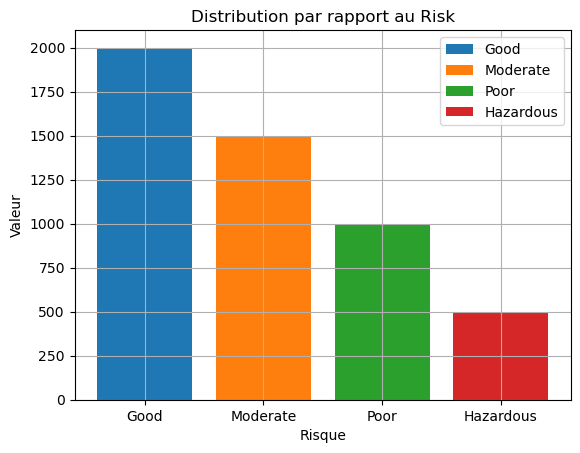

In [10]:
k= data['Air Quality'].value_counts()
for i , y in k.items():
    plt.bar(x=i,height=y, label=i)
    plt.title('Distribution par rapport au Risk')
    plt.xlabel("Risque")
    plt.ylabel("Valeur")
    plt.grid(True)
    plt.legend()

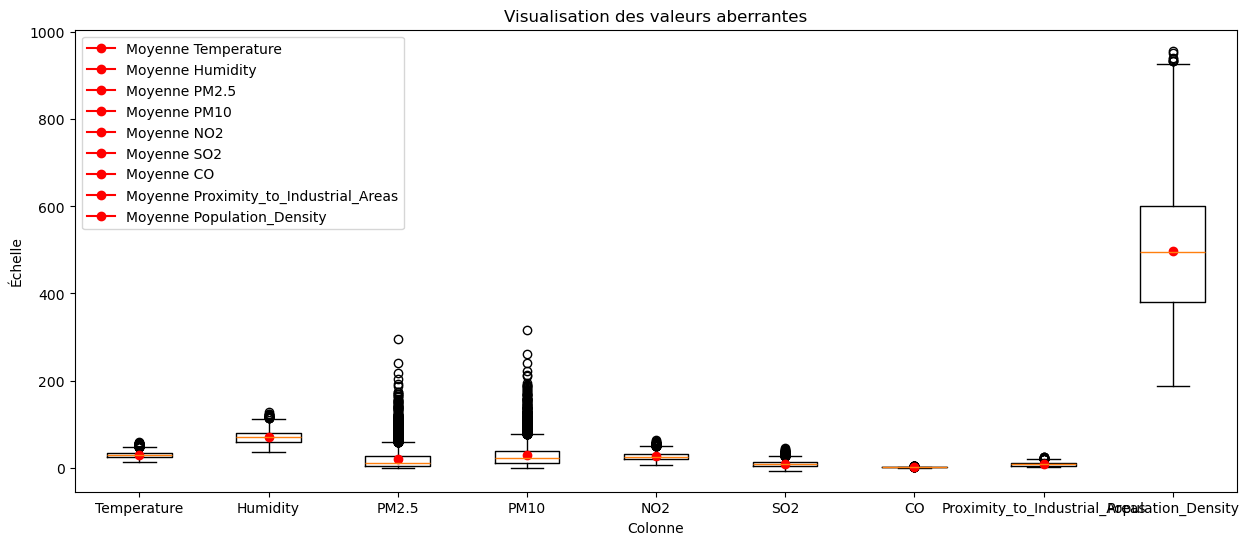

In [12]:
plt.figure(figsize=(15,6))
boxplot_data = plt.boxplot(data.select_dtypes(include='number').values, labels=data.select_dtypes(include='number').columns)  # Use .values and provide labels

plt.title('Visualisation des valeurs aberrantes')
plt.xlabel("Colonne")  # Corrected x-axis label
plt.ylabel('Échelle')  # Corrected y-axis label

# Create the legend
medians = [item.get_ydata()[0] for item in boxplot_data['medians']]
means = [np.mean(data[col]) for col in data.select_dtypes(include='number').columns] # Calculate means

for i, col in enumerate(data.select_dtypes(include='number').columns):
    plt.plot(i+1, means[i], marker='o', color='red', label=f'Moyenne {col}') # Plot means and add labels

plt.legend() # Show the legend

plt.show()

In [13]:
k=data.groupby('Air Quality').count()
k

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
Air Quality,,,,,,,,,
Good,2000,2000,2000,2000,2000,2000,2000,2000,2000
Hazardous,500,500,500,500,500,500,500,500,500
Moderate,1500,1500,1500,1500,1500,1500,1500,1500,1500
Poor,1000,1000,1000,1000,1000,1000,1000,1000,1000


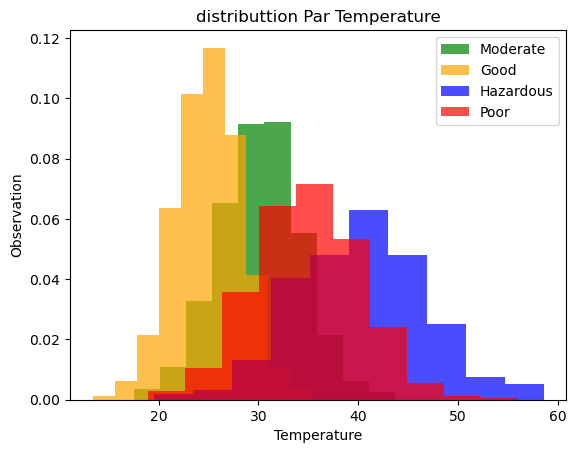

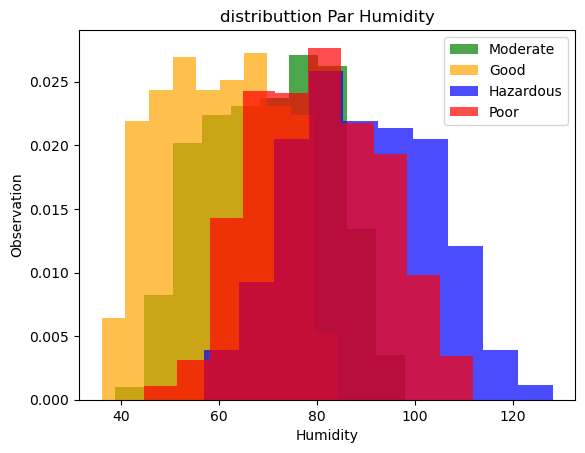

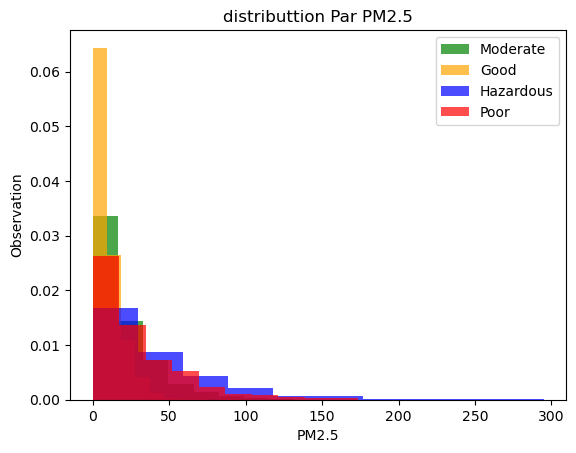

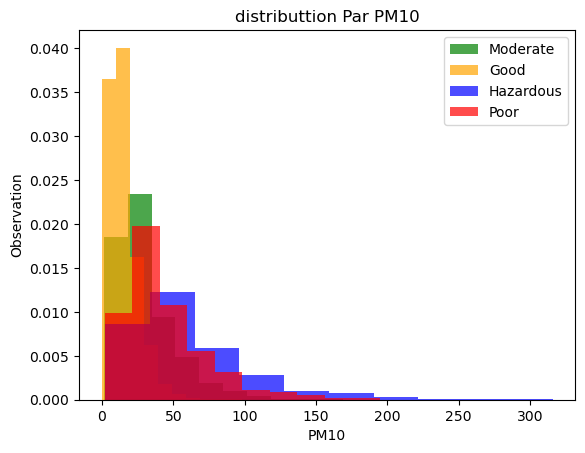

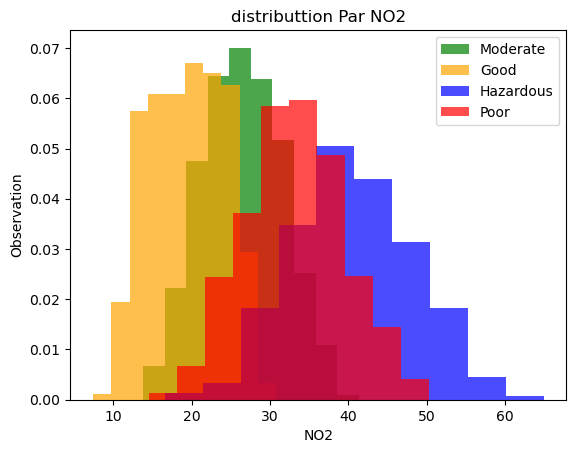

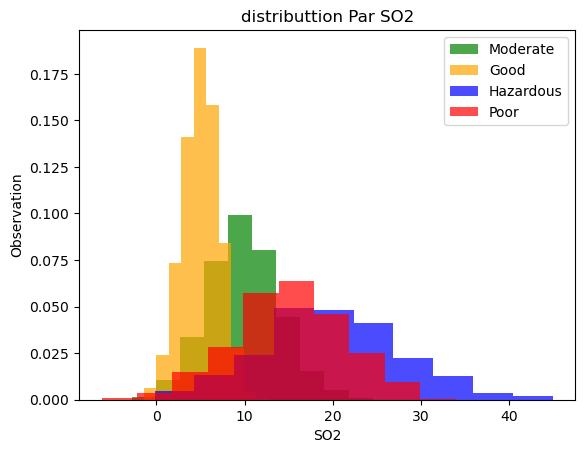

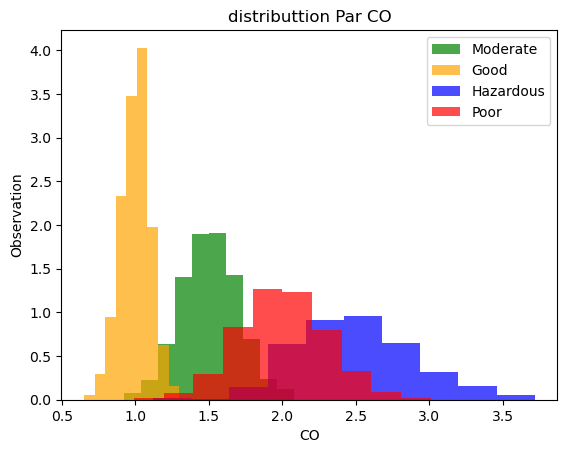

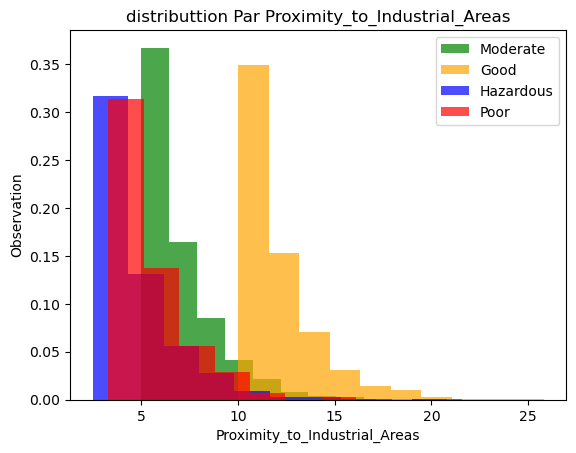

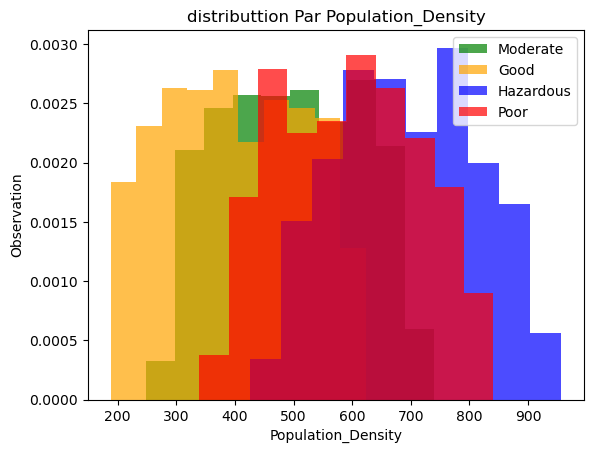

In [14]:
quality = ['Moderate', 'Good', 'Hazardous', 'Poor']
risk= ['Moderate', 'Good', 'Hazardous', 'Poor']
for  label in data.columns[:-1]:
    plt.hist(data[data['Air Quality']== risk[0]][label], label="Moderate", color='green', histtype='bar', alpha=0.7, density=True)
    plt.hist(data[data['Air Quality']== risk[1]][label], label="Good",color='orange', histtype='bar', alpha=0.7, density=True)
    plt.hist(data[data['Air Quality']== risk[2]][label], label="Hazardous",color='blue', histtype='bar', alpha=0.7, density=True)
    plt.hist(data[data['Air Quality']== risk[3]][label], label="Poor",color='red', histtype='bar', alpha=0.7, density=True)
    plt.title(f'distributtion Par {label}')
    plt.xlabel(label)
    plt.ylabel('Observation')
    plt.legend()
    plt.show()
    
   

# Outliers Treatments
*Traitement des valeurs emberrantes , pour mieux cerner la concentration des données et éviter les données qui vont au délàs de l'ensemblement général*

In [15]:
# l=pd.get_dummies(data,columns=['Air Quality'], drop_first=False).astype('int64')


In [16]:
def wisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw , uw

In [17]:
for i in data.select_dtypes(include="number").columns:
    lw , uw = wisker(data[i])
    data[i] = np.where(data[i] < lw, lw , data[i])
    data[i] = np.where(data[i] > uw, uw , data[i])

# Encoding of Data
*Le future model à contruire ne sera pas capable de comprendre des données catégoriques ex: lettre, signe , caractères spéciaux. par là, un encodage permettra l'attribution d'une valeur numérique correspondante à la valeur catégorielle.*

*Illustration:*

|label encoding | OneHotEncoding|
|---------------|----------------|
 |male -> 1   | male -> [1,0]    |
 |Female -> 0 | Female -> [0,1]  |

*De ce fait, <strong>l'encodage par label</strong> sera un excellent choix pour le cas des différentes types de qualitées de l'air à classifier*

In [18]:
from sklearn.preprocessing import LabelEncoder
Labeled_data = data
en = LabelEncoder()
Labeled_data['Air Quality']= en.fit_transform(Labeled_data['Air Quality'])

Labeled_data

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.20,17.9,18.9,9.2,1.72,6.3,319.0,2
1,28.3,75.6,2.30,12.2,30.8,9.7,1.64,6.0,611.0,2
2,23.1,74.7,26.70,33.8,24.4,12.6,1.63,5.2,619.0,2
3,27.1,39.1,6.10,6.3,13.5,5.3,1.15,11.1,551.0,0
4,26.5,70.7,6.90,16.0,21.9,5.6,1.01,12.7,303.0,0
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,58.35,76.8,45.5,25.7,2.11,2.8,765.0,1
4996,28.1,96.9,6.90,25.0,25.3,10.8,1.54,5.7,709.0,2
4997,25.9,78.2,14.20,22.1,34.8,7.8,1.63,9.6,379.0,2
4998,25.3,44.4,21.40,29.0,23.7,5.7,0.89,11.6,241.0,0


                               Temperature  Humidity     PM2.5      PM10  \
Temperature                       1.000000  0.470993  0.330877  0.457193   
Humidity                          0.470993  1.000000  0.273548  0.378634   
PM2.5                             0.330877  0.273548  1.000000  0.956813   
PM10                              0.457193  0.378634  0.956813  1.000000   
NO2                               0.597043  0.492774  0.341583  0.471096   
SO2                               0.575081  0.463123  0.320399  0.446128   
CO                                0.690711  0.569750  0.404494  0.555978   
Proximity_to_Industrial_Areas    -0.597541 -0.482545 -0.349428 -0.482697   
Population_Density                0.483463  0.411533  0.282476  0.390266   
Air Quality                       0.514279  0.432568  0.324115  0.444017   

                                    NO2       SO2        CO  \
Temperature                    0.597043  0.575081  0.690711   
Humidity                       0.4927

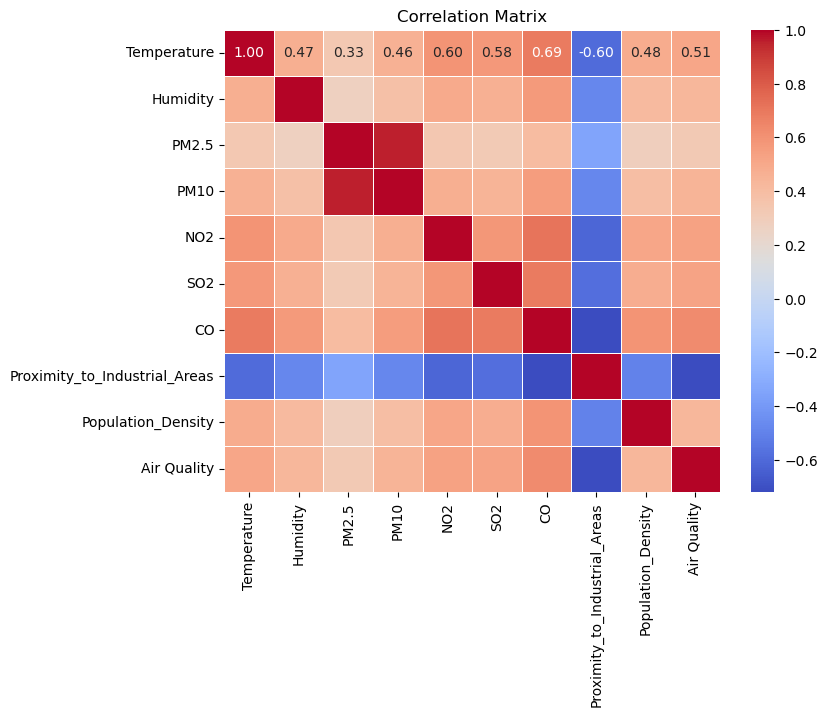

In [19]:
corr=data.select_dtypes(include='number').corr()
print(corr)
correlation_matrix = data.select_dtypes(include='number').corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

*Data Séparation by making features and target*

In [20]:
x = Labeled_data.drop(columns='Air Quality') #features
y= Labeled_data['Air Quality'] #target

# Split Dataset with training set and testing set
*Séparation du dataset en deux partitions , les données d'entrainnement et les données de test qui feront l'objet d'entraiment<br> et de l'évaluation du future model.*

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 0)  
# 80% => données d'entrainements
#20% => données de tests

In [22]:
(len(x_test) / len(Labeled_data))*100

20.0

# Scaling Data
*Mise à la même échelle de l'ensemble des données, envue de mettre toutes nos données sur un même diapason*

In [23]:

def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    Scaler = StandardScaler()
    x = Scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x,y)

    data = np.hstack((x , np.reshape(y, (-1,1))))
    

    return data , x , y, Scaler
    

In [24]:
train= np.hstack((x_train , np.reshape(y_train, (-1,1))))
test= np.hstack((x_test , np.reshape(y_test, (-1,1))))

In [25]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [26]:
train , x_train , y_train, scaler = scale_dataset(train, oversample=True)
test , x_test, y_test, scaler = scale_dataset(test, oversample=False)

# Building differents Models

*Enfin, nous avions acquérit une connaissance approndue sur le dataset par le preprocessing et nous avions préparer nos données pour la création des futures models 😊. ouups, lançons-nous* 

**SVM( support vecteur machine)**

In [27]:
from sklearn.svm import SVC

In [28]:
Svm_model = SVC()

In [29]:
Svm_model.fit(x_train,y_train)

SVC()

In [30]:
y_pred_svm=Svm_model.predict(x_test)

In [31]:
accuracy_score(y_test,y_pred_svm)

0.938

In [32]:
rapport_svm = classification_report(y_test,y_pred_svm)
print(rapport_svm)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       411
         1.0       0.79      0.84      0.81       106
         2.0       0.96      0.97      0.96       295
         3.0       0.85      0.81      0.83       188

    accuracy                           0.94      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.94      0.94      0.94      1000



**LogisticRegression**

In [33]:
from sklearn.linear_model import LogisticRegression
Lr_model = LogisticRegression(max_iter=200)

In [34]:
Lr_model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [35]:
y_pred_Lr=Lr_model.predict(x_test)


In [36]:
accuracy_score(y_test,y_pred_Lr)

0.933

In [37]:
Lr_rapport = classification_report(y_test,y_pred_Lr)
print(Lr_rapport)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       411
         1.0       0.79      0.84      0.82       106
         2.0       0.97      0.94      0.95       295
         3.0       0.83      0.83      0.83       188

    accuracy                           0.93      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.93      0.93      0.93      1000



**KNeighborsClassifier** ( plus proche voisin)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
Knn_model = KNeighborsClassifier()

In [40]:
Knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
y_pred_knn = Knn_model.predict(x_test)


In [42]:
accuracy_score(y_test,y_pred_knn)

0.906

In [43]:
rapport_knn= classification_report(y_test,y_pred_knn)
print(rapport_knn)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       411
         1.0       0.72      0.75      0.74       106
         2.0       0.94      0.94      0.94       295
         3.0       0.77      0.73      0.75       188

    accuracy                           0.91      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.91      0.91      0.91      1000



**DecisionTreeClassifier**

In [44]:
from sklearn.tree import DecisionTreeClassifier
Dt_model = DecisionTreeClassifier()

In [45]:
Dt_model.fit(x_train,y_train)


DecisionTreeClassifier()

In [46]:
y_pred_Dt = Dt_model.predict(x_test)

In [47]:
accuracy_score(y_test,y_pred_Dt)

0.919

In [48]:
rapport_Dt = classification_report(y_test,y_pred_Dt)
print(rapport_Dt)

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       411
         1.0       0.81      0.75      0.78       106
         2.0       0.93      0.95      0.94       295
         3.0       0.79      0.80      0.80       188

    accuracy                           0.92      1000
   macro avg       0.88      0.87      0.88      1000
weighted avg       0.92      0.92      0.92      1000



**RandomForestClassifier**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
Rf_model= RandomForestClassifier(random_state=0)

In [ ]:
# Définition des hyperparamètres à tester
param_grid = {
    'n_estimators': [100,150],  # Nombre d'arbres
    'max_depth': [10, 20],    # Profondeur max
    'min_samples_split': [2, 5], # Nombre min d’échantillons pour diviser un nœud
    'min_samples_leaf':[1,2] # min. d'example par feuille
}

# GridSearchCV avec validation croisée (cv=5)
grid_search = GridSearchCV(Rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=2)

# Entraînement
grid_search.fit(x_train, y_train)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)

In [51]:
Rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [52]:
y_pred_Rf = Rf_model.predict(x_test)

In [53]:
accuracy_score(y_test,y_pred_Rf)

0.948

In [54]:
rapport_Rf = classification_report(y_test,y_pred_Rf)
print(rapport_Rf)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       411
         1.0       0.87      0.84      0.86       106
         2.0       0.96      0.96      0.96       295
         3.0       0.85      0.87      0.86       188

    accuracy                           0.95      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000



**Naives_Bayes**

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
Nb_model = GaussianNB()

In [57]:
Nb_model.fit(x_train,y_train)

GaussianNB()

In [58]:
y_pred_Nb=Nb_model.predict(x_test)


In [59]:
accuracy_score(y_test,y_pred_Nb)

0.933

In [60]:
rapport_Nb = classification_report(y_test,y_pred_Nb)
print(rapport_Nb)

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       411
         1.0       0.81      0.87      0.84       106
         2.0       0.96      0.93      0.95       295
         3.0       0.83      0.85      0.84       188

    accuracy                           0.93      1000
   macro avg       0.90      0.91      0.90      1000
weighted avg       0.93      0.93      0.93      1000



# sauvegarde du model
*Après avoir effectuer une évaluation sur les performances de chaque model, nous optons pour construit avec le <strong>RandomForest</strong>( forêt aléatoire) car il nous illustres de bon performances. De ce fait, il sera utilisé pour le déploiement*

In [103]:
path ="Air_Quality/Air_qualityV1.sav"
path_scale ="Air_Quality/scale.sav"
pickle.dump(Rf_model,open(path,'wb'))
pickle.dump(scaler,open(path_scale, 'wb') )


In [104]:
import pickle
model = pickle.load(open(path,'rb'))
scaler = pickle.load(open(path_scale,'rb'))

In [ ]:


39.2,73.7,23.5,44.1,43.7,15.4,2.49,3,787,Hazardous
37.3,59.7,12.2,26.6,37.7,24.1,2.25,4.1,640,Poor
32.9,110.4,20.8,40.4,32,25.8,2.5,5,775,Hazardous

0 ---> good
1 ---> hazardous
2 ---> moderate
3 ---> poor


In [145]:

quality_class=["GOOD",'HAZARDOUS',"MODERATE", "POOR"]
emoji = ['🤗😊','😣','😑','😔😓']
d=scaler.transform([[28.5,74.4,14.1,30.3,33.8,23.3,2.45,3.6,422]])
d=np.reshape(d,(1,-1))
h=model.predict(d)
quality=int(h[0])


print(f"the quality of the air in that area is {quality_class[quality]} means {emoji[quality]}")




the quality of the air in that area is POOR means 😔😓
